In [1]:
data = {
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

In [3]:
import pandas as pd
df=pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [4]:
import math
# Function to calculate Entropy for an attribute
def entropy(data):
    total_count = len(data)
    if total_count == 0:
        return 0
    counts = data.value_counts()
    entropy_value = -sum((count / total_count) * math.log2(count / total_count) for count in counts)
    return entropy_value

In [6]:
# Function to calculate Information Gain for an attribute
def calculate_information_gains(dataframe, target_column):
    information_gains = {}
    root_entropy = entropy(dataframe[target_column])

    for attribute in dataframe.columns:
        if attribute == target_column:
            continue
        weighted_entropy = 0
        for value in dataframe[attribute].unique():
            subset = dataframe[dataframe[attribute] == value]
            subset_entropy = entropy(subset[target_column])
            weight = len(subset) / len(dataframe)
            weighted_entropy += weight * subset_entropy
        information_gain_value = root_entropy - weighted_entropy
        information_gains[attribute] = information_gain_value

    return information_gains

In [8]:
# Find the attribute with the highest information gain
best_attribute = max(information_gains, key=information_gains.get)
best_attribute

'age'

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate the target variable
target = df['buys_computer']
features = df.drop('buys_computer', axis=1)

# Define categorical columns for one-hot encoding
categorical_cols = ['age', 'income', 'student', 'credit_rating']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Create a Decision Tree model and a pipeline to preprocess and fit the model
tree_classifier = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', tree_classifier)])
pipeline.fit(features, target)

# Get the depth of the constructed tree
tree_depth = tree_classifier.get_depth()

print(f"The depth of the Decision Tree is: {tree_depth}")

The depth of the Decision Tree is: 4


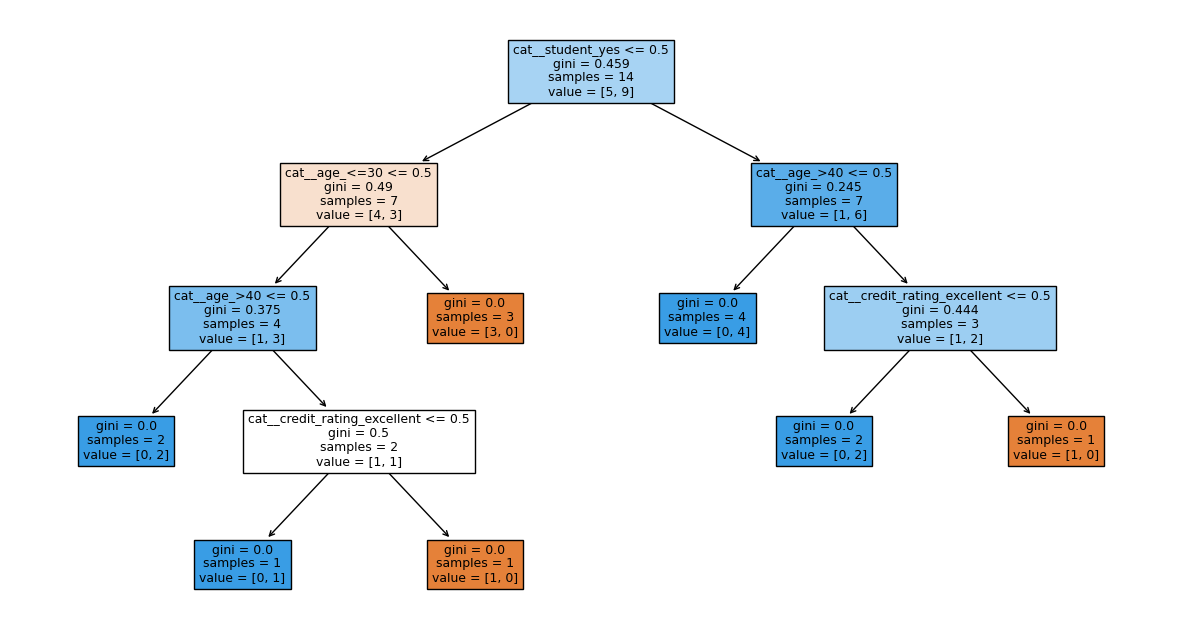

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(tree_classifier, filled=True, feature_names=list(pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=categorical_cols)))
plt.show()